In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/bodyfat.csv')

In [3]:
from sklearn.preprocessing import StandardScaler



In [4]:
def my_train_test_split(df: pd.DataFrame, y_columns, test_size, random_state=None):
    # shuffle
    df = df.sample(frac=1, random_state=random_state)
    scaler = StandardScaler()

    x_columns = [col for col in df.columns if col not in y_columns]

    X = df[x_columns].to_numpy()
    Y = df[y_columns].to_numpy()

    X = scaler.fit_transform(X)
    Y = scaler.fit_transform(Y)


    split_index = int((1.0 - test_size) * len(df))


    # Finally, we split the data
    X_train = X[:split_index].reshape(split_index, len(x_columns), 1)
    Y_train = Y[:split_index].reshape(split_index, len(y_columns), 1)
    X_test = X[split_index:].reshape(len(df) - split_index, len(x_columns), 1)
    Y_test = Y[split_index:].reshape(len(df) - split_index, len(y_columns), 1)

    return X_train, Y_train, X_test, Y_test

In [5]:
xtrain, ytrain, xtest, ytest = my_train_test_split(data, ['BodyFat'], 0.3)

In [6]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1])
ytrain = ytrain.reshape(ytrain.shape[0], ytrain.shape[1]).squeeze(axis=1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1])
ytest = ytest.reshape(ytest.shape[0], ytest.shape[1]).squeeze(axis=1)

In [7]:
EPOCH = 200
ALPHA = 0.43
DEBUG = 1


In [8]:
from net import MLP
net = MLP(nin=14, nouts=[8, 6, 3, 1])

In [9]:
J = []

for k in range(EPOCH):
  
    # Forward pass
    ypred = [net(x) for x in xtrain]
    
    cost = sum((yout - ygt) ** 2 for ygt, yout in zip(ytrain, ypred)) / (2 * len(ytrain))

    for p in net.parameters():
        p.grad = 0.0
    
    # Compute gradients using the backward method
    cost.backward()

    # Update weights
    for p in net.parameters():
        p.data += -ALPHA * p.grad
    
    J.append(cost)
    
    if DEBUG:
        print("epoch ", k+1, " loss ", cost)
        print('GRAD', [p.grad for p in net.parameters()])
        print('DATA', [p.data for p in net.parameters()], '\n')

    

epoch  1  loss  T(4.996105667779758, 1.0)
GRAD [0.19662056899082206, 0.00221055254625377, -0.2753045833103051, -0.025659968189186755, -0.25729160085300434, -0.24574949512905675, -0.23298414366000364, -0.26113028491762746, -0.2719003399205256, -0.2455367460700043, -0.19995853418917034, -0.3067363699858832, -0.2839557430425037, -0.2526223931521027, 0.14854527502943526, 0.15638215311160342, 0.1672149317381848, -0.47462564721936923, -0.24515172262395604, -0.39280676935562947, -0.3431600304568505, -0.3434616216766127, -0.4365987712581454, -0.4418583455022546, -0.46231859279808163, -0.3844429453398936, -0.4105180697350339, -0.3096001927555054, -0.3516985172451248, -0.42718296970942243, 0.019996912281804606, -0.7031909842474818, 1.2542156268650253, 0.5955352964729796, 1.2397744538948456, 0.8493400656746369, 0.6965227279374275, 1.1233068904227623, 1.18898590996545, 1.0893883884907003, 1.2729746930823296, 1.281891532108583, 0.8915576485595351, 1.161025827704979, 1.1889014998650416, -0.145589911

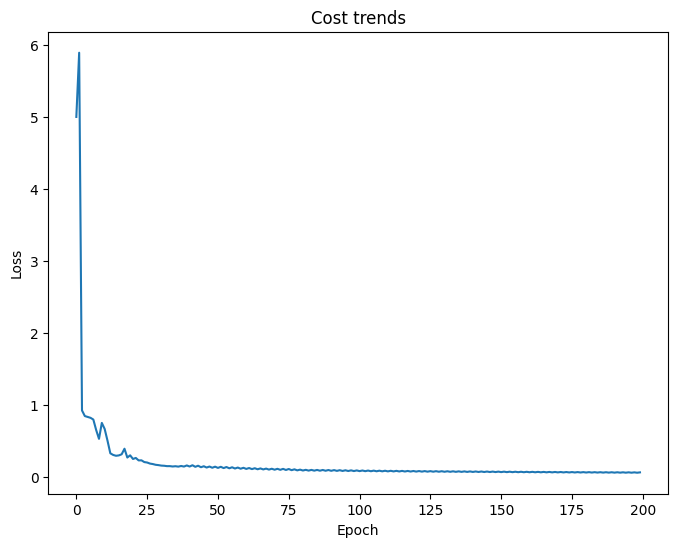

In [10]:
plt.figure(figsize=(8,6))
plt.plot([j.data for j in J])
plt.title('Cost trends')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [11]:
ytest_pred = [net(x) for x in xtest]
for y, ytru in zip(ytest_pred, ytest):
    print(y, ytru)

T(0.26970196062761564, 0.0) 0.16154059905082446
T(-0.5866824347366413, 0.0) -0.37724481072457294
T(1.2826079695521861, 0.0) 1.1792463730710194
T(0.5334530924476195, 0.0) 0.05378351709574516
T(1.9265919487705956, 0.0) 1.897626919438216
T(-0.9998748867261162, 0.0) -1.5027076666998476
T(1.4280169384345198, 0.0) 0.9757052182669806
T(0.899933134097894, 0.0) 0.6883529997201018
T(1.04032471633325, 0.0) 0.7242720270384616
T(-0.9999740669384908, 0.0) -1.3470585483202882
T(1.6458497625716402, 0.0) 1.8377618739076163
T(1.5659504514305773, 0.0) 0.9757052182669806
T(-0.9999852641633888, 0.0) -1.3350855392141683
T(-0.9996787213600169, 0.0) -1.394950584744768
T(-0.8850530187211296, 0.0) -0.5328939291041322
T(-0.17419348084188235, 0.0) -0.11383861038993429
T(-0.9999994100962742, 0.0) -1.814005903458966
T(-0.8770131113824494, 0.0) -0.37724481072457294
T(-0.9720046886622465, 0.0) -1.167463411728489
T(0.2043165590106395, 0.0) 0.2812706901120239
T(2.27622784986984, 0.0) 1.813815855695376
T(-0.521671788320